In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [153]:
df = pd.read_csv('customer_data.csv')
df.columns = [col.lower() for col in df.columns]
df.columns = df.columns.str.replace(' ', '_')
df.drop(columns=['customerid', 'count'], axis = 1, inplace=True)

In [154]:
y = df['churn_value']
df.drop(columns=['churn_value', 'churn_label', 'churn_score', 'cltv', 'churn_reason'], inplace=True)
df.drop(columns=['country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude'], inplace=True)
X = df.loc[:]

In [155]:
oe = OrdinalEncoder()
oe.fit_transform(X)

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 4.360e+02,
        1.570e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 7.290e+02,
        9.250e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 1.274e+03,
        6.104e+03],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 1.340e+03,
        5.698e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 1.370e+02,
        2.994e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.388e+03,
        5.407e+03]])

In [156]:
for col in X.columns:
    if X.columns.dtype == 'object':
        X[col] = oe.fit_transform(X[[col]])
new_features = pd.DataFrame(X, columns=['tenure_months', 'monthly_charges', 'total_charges'])

In [157]:
# plt.figure(figsize=(20,20))
# cor = X.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [158]:
model_tree = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
model_tree.fit(X, y)
importance_tree = model_tree.feature_importances_
for i, v in enumerate(importance_tree):
    print('Feature: %0d, Score: %.5f' %(i,v))

Feature: 0, Score: 0.02739
Feature: 1, Score: 0.02101
Feature: 2, Score: 0.02495
Feature: 3, Score: 0.03578
Feature: 4, Score: 0.16990
Feature: 5, Score: 0.00550
Feature: 6, Score: 0.02245
Feature: 7, Score: 0.02401
Feature: 8, Score: 0.04787
Feature: 9, Score: 0.02746
Feature: 10, Score: 0.02360
Feature: 11, Score: 0.04585
Feature: 12, Score: 0.01677
Feature: 13, Score: 0.01671
Feature: 14, Score: 0.07831
Feature: 15, Score: 0.02487
Feature: 16, Score: 0.05005
Feature: 17, Score: 0.17193
Feature: 18, Score: 0.16559


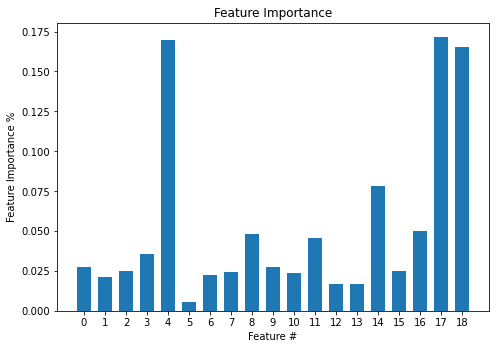

In [159]:
values = ([x for x in range(len(importance_tree))], importance_tree)
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(values[0], values[1], 0.7)
ax.set_ylabel('Feature Importance %')
ax.set_title('Feature Importance')
ax.set_xlabel('Feature #')
ax.set_xticks(range(len(values[1])))
plt.show()

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7984386089425124

In [161]:
# cols_to_drop = []
# for idx, val in enumerate(importance_tree):
#     if val < 0.027 or val <= 0:
#         cols_to_drop.append(X.columns[idx - 1])

In [162]:
# for col in cols_to_drop:
#     X.drop(columns=col, inplace=True)

In [163]:
model_tree = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(new_features, y, test_size=0.2, random_state=0)
model_tree.fit(X_train, y_train)
importance_tree2 = model_tree.feature_importances_
for i, v in enumerate(importance_tree2):
    print('Feature: %0d, Score: %.5f' %(i,v))

Feature: 0, Score: 0.27001
Feature: 1, Score: 0.38812
Feature: 2, Score: 0.34187


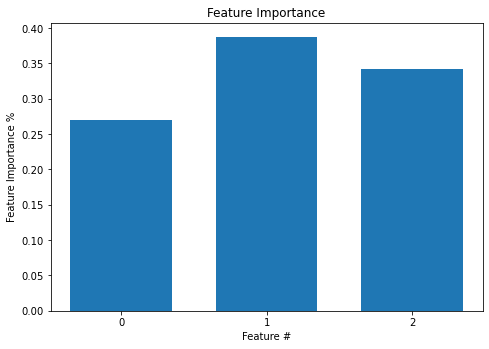

In [164]:
values = ([x for x in range(len(importance_tree2))], importance_tree2)
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(values[0], values[1], 0.7)
ax.set_ylabel('Feature Importance %')
ax.set_title('Feature Importance')
ax.set_xlabel('Feature #')
ax.set_xticks(range(len(values[1])))
plt.show()

In [166]:
X_train, X_test, y_train, y_test = train_test_split(new_features, y, test_size=0.2, random_state=0)
clf2 = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.7508871540099361